In [1]:
import mysql.connector
import pandas as pd
import datetime
from pandas.io import sql
from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import mysql_save_load

In [2]:
mydb = mysql_save_load.connectDB("tim_test")
df_pred = pd.read_sql("SELECT * FROM pred", con=mydb)
df_camp = pd.read_sql("SELECT * FROM by_campaign", con=mydb)

In [54]:
df_pred.tail(1)

,ad_id,request_time,pred_cpc,pred_budget,avgspeed,speed,pred_click,next_cpc,decide_type,date
22512,2.384287e+16,2018-10-22 14:22:08,4.16055,300.0,0.548246,2.375,4.04574,5.0,CPC,2018-10-22


In [ ]:
df_camp.tail(1)

In [3]:
YESTERDAY = datetime.datetime.now().date() - datetime.timedelta(1)

In [4]:
df_pred['date'] = df_pred['request_time'].dt.date
df_camp['date'] = df_camp['request_time'].dt.date

In [5]:
df_pred_ = df_pred[ (df_pred.ad_id == 23842869152850246) & (df_pred.date == YESTERDAY) ].reset_index()
df_real = df_camp[ (df_camp.ad_id == 23842869152850246) & (df_camp.date == YESTERDAY) ].reset_index()

In [6]:
df_real['realtime clicks'] = df_real['clicks'] - df_real['clicks'].shift(1)
df_real['realtime impressions'] = df_real['impressions'] - df_real['impressions'].shift(1)
df_real['ratio'] = df_real['realtime clicks'] / df_real['realtime impressions'] * 100

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

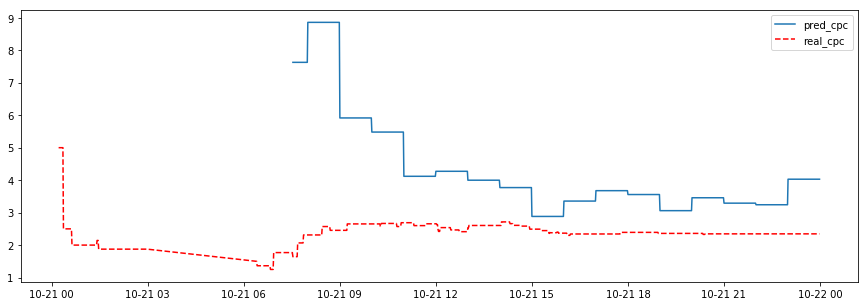

In [8]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred_.request_time, df_pred_['pred_cpc'], label='pred_cpc' )
plt.plot( df_real.request_time, df_real['cpc'], 'r--', label='real_cpc' )
plt.legend(loc='upper right')

Text(0, 0.5, 'realtime cumulative clicks')

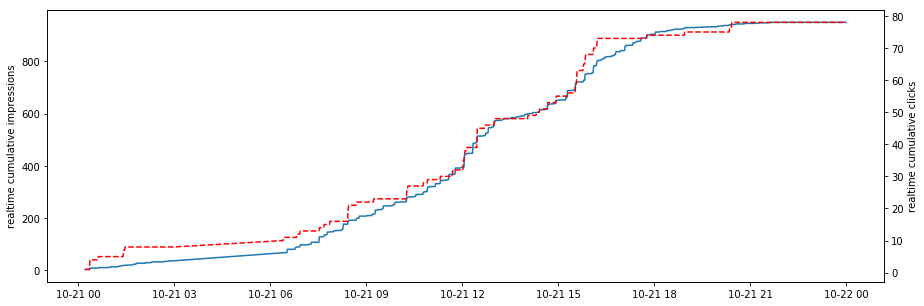

In [9]:
### real cumulative impressions vs real cumulative clicks
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.plot( df_real.request_time, df_real['impressions'], label='impressions' )
ax1.set_ylabel('realtime cumulative impressions')

ax2 = ax1.twinx()
ax2.plot( df_real.request_time, df_real['clicks'], 'r--', label='clicks' )
ax2.set_ylabel('realtime cumulative clicks')


Text(0, 0.5, 'realtime clicks')

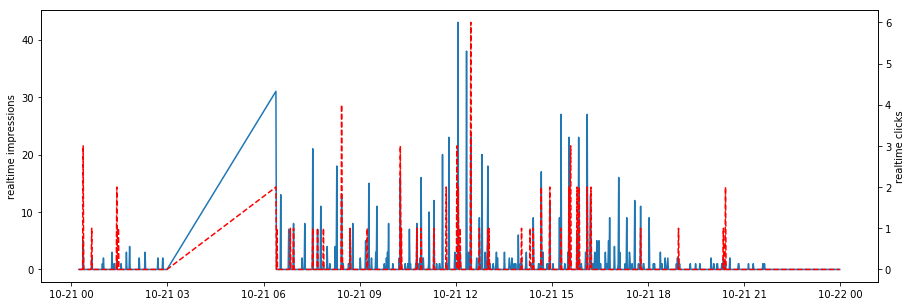

In [10]:
### real impressions vs real clicks
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
ax1.plot( df_real.request_time, df_real['impressions'] - df_real['impressions'].shift(1), label='impressions' )
ax1.set_ylabel('realtime impressions')

ax2 = ax1.twinx()
ax2.plot( df_real.request_time, df_real['clicks'] - df_real['clicks'].shift(1), 'r--', label='clicks' )
ax2.set_ylabel('realtime clicks')

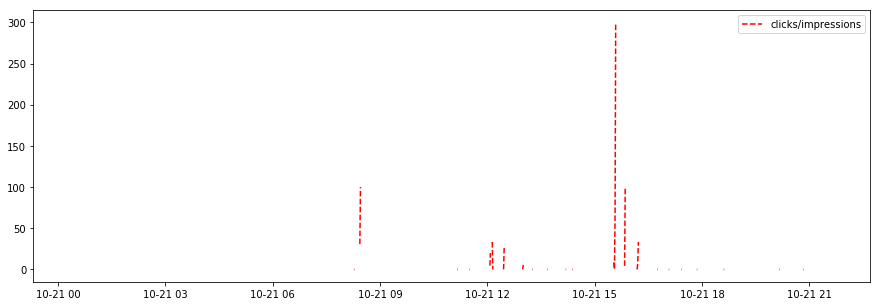

In [11]:
### clicks/impresions ratio
fig = plt.figure(figsize=(15, 5))
plt.plot( df_real.request_time, df_real['ratio'], 'r--', label='clicks/impressions' )
plt.legend(loc='upper right')

Text(0, 0.5, 'realtime ratio (%)')

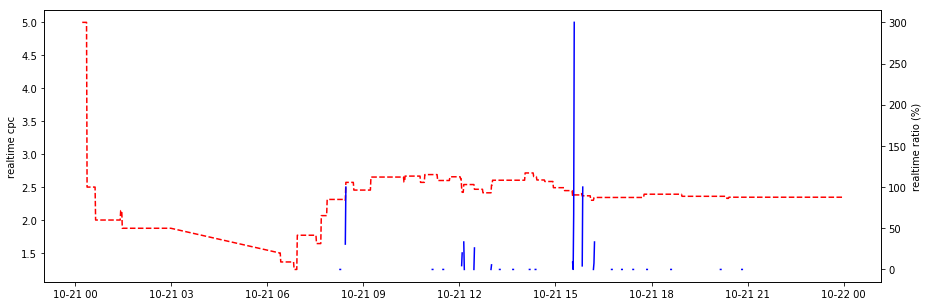

In [12]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(111)
ax1.plot( df_real.request_time, df_real['cpc'], 'r--', label='cpc' )
ax1.set_ylabel('realtime cpc')

ax2 = ax1.twinx()
ax2.plot( df_real.request_time, df_real['ratio'], 'b', label='clicks/impressions' )
ax2.set_ylabel('realtime ratio (%)')

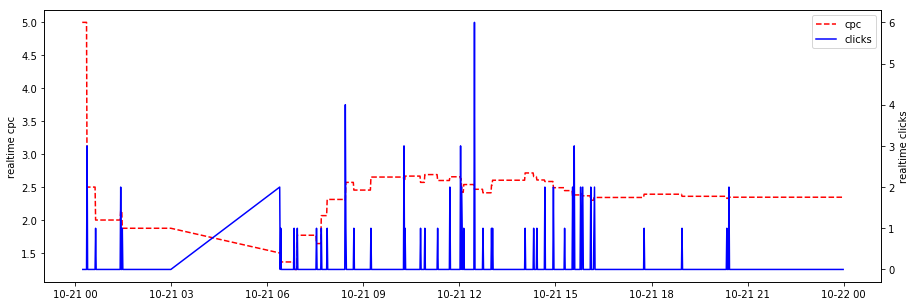

In [13]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(111)
lns1 = ax1.plot( df_real.request_time, df_real['cpc'], 'r--', label='cpc' )
ax1.set_ylabel('realtime cpc')

ax2 = ax1.twinx()
lns2 = ax2.plot( df_real.request_time, df_real['realtime clicks'], 'b', label='clicks' )
ax2.set_ylabel('realtime clicks')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]

ax2.legend(lns, labs, loc=0)

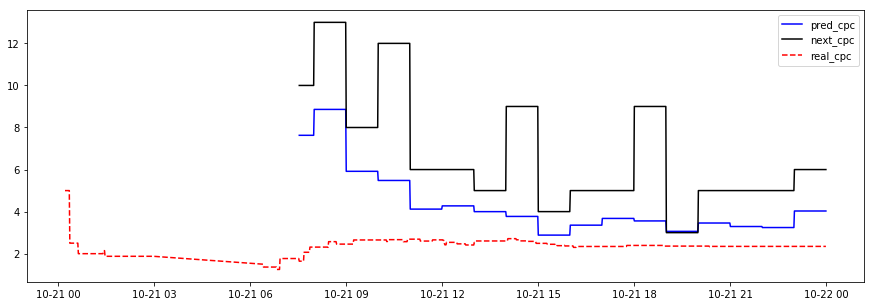

In [40]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred_.request_time, df_pred_['pred_cpc'], 'b', label='pred_cpc' )
plt.plot( df_pred_.request_time, df_pred_['next_cpc'], 'black', label='next_cpc' )
plt.plot( df_real.request_time, df_real['cpc'], 'r--', label='real_cpc' )
plt.legend(loc=0)

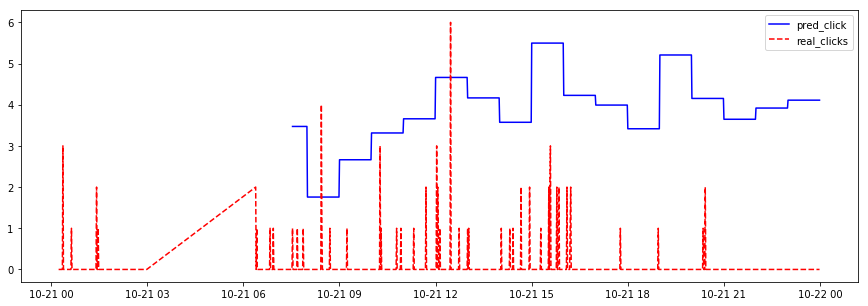

In [58]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred_.request_time, df_pred_['pred_click'], 'b', label='pred_click' )
plt.plot( df_real.request_time, df_real['realtime clicks'], 'r--', label='real_clicks' )
plt.legend(loc=0)

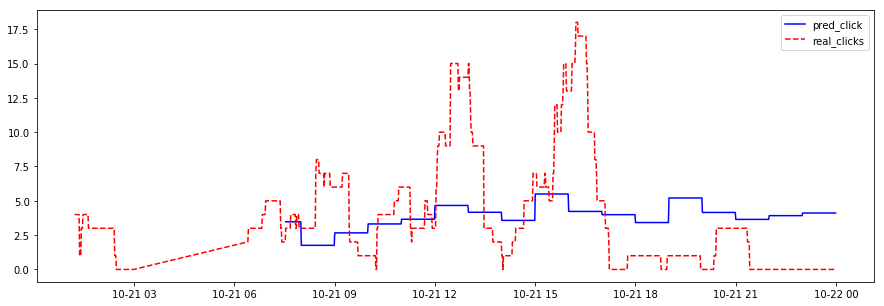

In [63]:
fig = plt.figure(figsize=(15, 5))
plt.plot( df_pred_.request_time, df_pred_['pred_click'], 'b', label='pred_click' )
plt.plot( df_real.request_time, df_real['clicks'] - df_real['clicks'].shift(60), 'r--', label='real_clicks' )
plt.legend(loc=0)

In [73]:
df = df_real['clicks'] - df_real['clicks'].shift(60)
df = df.dropna()
for i in range(0, len(df_pred_), 60):
    print(i, '---', df.iloc[i], '---',df_pred_['pred_click'].iloc[i])

0 --- 4.0 --- 3.47245
60 --- 3.0 --- 1.75781
120 --- 3.0 --- 2.66361
180 --- 3.0 --- 3.31407
240 --- 7.0 --- 3.65803
300 --- 2.0 --- 4.66232
360 --- 4.0 --- 4.1655
420 --- 3.0 --- 3.57331
480 --- 15.0 --- 5.49644
540 --- 3.0 --- 4.22704
600 --- 3.0 --- 3.99135
660 --- 12.0 --- 3.41604
720 --- 10.0 --- 5.2077
780 --- 0.0 --- 4.15248
840 --- 1.0 --- 3.64675
900 --- 1.0 --- 3.91907
960 --- 3.0 --- 4.11058
